## Homework Assignment 3

In this assignment we ask you to further investigate the crime statistics. 

In [Lecture 2, Week 8](../Week.8/Lecture.2.ipynb) we did a PCA analysis of the crime data where we *binned* the data in daily counts by crime type.  In this assignment we ask you to start your analysis using a few other binning techniques.  We will then ask you to investigate the results, making plots of the data. 

**Problem 1)** Do a PCA analysis where you bin the data into $86*6=516$ bins. There are $86$ crime types, and six $4$-hour periods in a day:
 - midnight to 4am
 - 4am to 8am
 - 8am to noon
 - noon to 4pm
 - 4pm to 8pm
 - 8pm to midnight
 
Thus, for every day, we will have a $516$-component vector that describes the counts of the various crime types in each $4$-hour period.  

 1a) Do PCA analysis on this *binning* of the data.  For the pre-grading script, please print your **explained_variance__**. 

 1b) Interpret the first four largest eigenvectors.  If the crimes types corellate, what if any relation is there between them? If there is an inverse corellation, what might be the cause of this inverse corellation?
 
 Things to consider (for problems 1,2,3):
  - Do the crimes happen in different locations?  A heat map would help with this. 
  - Do the crime happen  at different times?  A plot might help with this. 
  - If you notice any strong trends (corellation or inverse-corellation), perhaps make a plot and try a least-squares interpolation. 
 

In [1]:
## A little code to load the vicpd library from the Week.8 directory.
##  we could of course just move the vicpd.py file. . . but we could also do this.
import os, sys
dirn, modn = os.path.split("../Week.8/vicpd.py")
modn = os.path.splitext(modn)[0]
path = list(sys.path)
sys.path.insert(0, dirn)
try:
     vpd = __import__(modn)
finally:
    sys.path[:] = path # restore

Loading the VicPD library.
[cdata] 5 years and 150 days of crime data. 86607 records total.
[ctypes] tree structure of crime types
[all_tots] totals for crime types
[all_freq] relative frequencies of crime types
[weekdaycount] loaded
[weekdaypct] loaded
[presentBDWeek] loaded
[wdatlist] 5 years and 177 days of weather data, dict of (max c, min c, mean c, rain cm, snow cm) indexed on date
VicPD library loaded.


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
#%matplotlib nbagg
import numpy as np
from sklearn.decomposition import PCA

In [25]:
## Let's set up the binning for Problem 1. 
import itertools as it

tbinstr = ['0am-4am', '4am-8am', '8am-12pm', '12pm-4pm', '4pm-8pm', '8pm-12am']
# list of crime types and time periods -- the binning index
ctnl = []
for a,b in vpd.ctypes.items():
    for c,j in it.product(b, range(6)):
        ctnl.append((a,c,j))
        
## reverse-lookup dictionary, to get the index of the crime type and time chunk.
rev_ctnl = dict([(ctnl[i], i) for i in range(len(ctnl))])

## cdata dates as a set
cdays = set([c.incident_datetime.date() for c in vpd.cdata])
cdayl = list(cdays)

## reverse-lookup a date
rdaylook = dict([(cdayl[i], i) for i in range(len(cdayl))])

A = np.zeros( (len(cdayl), len(ctnl) ) )
for c in vpd.cdata:
    A[rdaylook[c.incident_datetime.date()],\
      rev_ctnl[(c.parent_incident_type, c.incident_type_primary,\
                  c.incident_datetime.hour//4)]] += 1.0

## build the data matrix. Every day will have a column consisting of the counts
##  of the crime types on that day. 

pca = PCA(n_components=len(ctnl))
pca.fit(A)

C = pca.components_

print(" * * * Problem 1 PCA eig-val mag * * * \n")
for i in range(5):
    print("ev %.8f " %pca.explained_variance_[i], end='')

 * * * Problem 1 PCA eig-val mag * * * 

ev 2.52021175 ev 2.23155810 ev 1.82313694 ev 1.74143715 ev 1.29316205 

In [4]:
## takes as input the row number of the PCA analysis, and prints short string explaining
## what it means
def exp_row_pca(C, r):
    ## list of entries w/index
    Cl = [(100*C[r,i], i) for i in range(C.shape[1])]
    Cs = sorted(Cl)
    Cs.reverse()
    Cp = [c for c in Cs if c[0]>0.0]
    Cn = [c for c in Cs if c[0]<0.0]
    Cn.reverse()
    return (Cp, Cn)

def text_corr(C, r):
    Cp, Cn = exp_row_pca(C,r)
    print("+corr: ")
    for x in Cp:
        if (x[0]>15.0):
            print(" ", ctnl[x[1]][0]+"--"+ctnl[x[1]][1]+" "+tbinstr[ctnl[x[1]][2]],\
                  " pct %.1f" % x[0])
    print("-corr: ")
    for x in Cn:
        if (x[0]<-15.0):
            print(" ", ctnl[x[1]][0]+"--"+ctnl[x[1]][1]+" "+tbinstr[ctnl[x[1]][2]],\
                  " pct %.1f" % x[0])

print(" * * * Problem 1 PCA * * * \n")
for i in range(2):
    if (i!=0): print("\n")
    print("Eigenvalue ", i+1, " variance %.1f" % pca.explained_variance_[i])
    text_corr(C,i)   

 * * * Problem 1 PCA * * * 

Eigenvalue  1  variance 2.5
+corr: 
-corr: 
  Liquor--LIQUOR-INTOX IN PUBLIC PLACE 8pm-12am  pct -49.4
  Liquor--LIQUOR-INTOX IN PUBLIC PLACE 0am-4am  pct -46.8
  Other--BYLAW-NOISE 8pm-12am  pct -35.7
  Other--BYLAW-NOISE 0am-4am  pct -32.7
  Other--SUSPICIOUS PERS/VEH/OCCURRENCE 8pm-12am  pct -24.3
  Other--SUSPICIOUS PERS/VEH/OCCURRENCE 0am-4am  pct -19.6
  Liquor--LIQUOR-INTOX IN PUBLIC PLACE 4pm-8pm  pct -19.2
  Other--SUSPICIOUS PERS/VEH/OCCURRENCE 12pm-4pm  pct -18.1
  Other--SUSPICIOUS PERS/VEH/OCCURRENCE 4pm-8pm  pct -17.3


Eigenvalue  2  variance 2.2
+corr: 
  Liquor--LIQUOR-INTOX IN PUBLIC PLACE 0am-4am  pct 38.3
  Other--BYLAW-NOISE 0am-4am  pct 27.1
-corr: 
  Theft from Vehicle--THEFT FROM MV UNDER $5000 8am-12pm  pct -49.3
  Other--SUSPICIOUS PERS/VEH/OCCURRENCE 12pm-4pm  pct -31.9
  Other--SUSPICIOUS PERS/VEH/OCCURRENCE 8am-12pm  pct -27.5
  Other--SUSPICIOUS PERS/VEH/OCCURRENCE 4pm-8pm  pct -25.4
  Other--SUSPICIOUS PERS/VEH/OCCURRENCE 8pm-

In [5]:
## build list of the crimes corresponding to the eigenvectors. . . 
## so we can plot their relative times, relative locations, etc. 

## eign is the eigenvector number from the PCA analysis
## itlist is the list of the components (crime types) you want, indexed
## from largest to smallest, i.e. pitlist=[0,1,4] and eign=2 would give
## the 1st, 2nd and 5th largest crime (positively correllated) components of the 3rd (eign=2) eigenvector.
def listCrimesEigVec(eign, pitlist, nitlist, psig=1, nsig=-1):    
    Cl = [(100*C[eign,i], i) for i in range(C.shape[1])]
    Cs = sorted(Cl)
    Cs.reverse()
    Cp = [c for c in Cs if c[0]>0.0]
    Cn = [c for c in Cs if c[0]<0.0]
    Cn.reverse()
    ## list of crime type descriptors. 
    pic = [ctnl[Cp[i][1] if psig==1 else Cn[i][1]] for i in pitlist]
    nic = [ctnl[Cn[i][1] if nsig==-1 else Cp[i][1]] for i in nitlist]
    ## now let's build the records. 
    picr = []
    for x in pic:
        picri = []
        for c in vpd.cdata:
            if c.parent_incident_type == x[0] and\
               c.incident_type_primary == x[1] and\
               c.incident_datetime.hour//4 == x[2]:
                picri.append(c)
        picr.append(picri)
    nicr = []
    for x in nic:
        nicri = []
        for c in vpd.cdata:
            if c.parent_incident_type == x[0] and\
               c.incident_type_primary == x[1] and\
               c.incident_datetime.hour//4 == x[2]:
                nicri.append(c)
        nicr.append(nicri)
                
    return (picr, nicr, pic, nic)
            

In [6]:
expaths = ["/usr/lib/python3/dist-packages", "/usr/local/lib/python3.5/dist-packages"]
for xp in expaths:
    if (xp not in sys.path):
        sys.path.append(xp)

import folium as fo
from folium import plugins as fpl

In [7]:
## a heat plot routine that uses the output of listCrimesEigVec
## pass the same arguments as listCrimesEigVec.
def hpCrimes(eign, pitlist, nitlist, psig=1, nsig=-1):
    print("Heat map for eigenvalue ", eign+1)
    X = listCrimesEigVec(eign, pitlist, nitlist, psig, nsig)
    print("Displayed crimes:\n "+str(psig)+" (yellow-lime-green)", X[2], "\n "+str(nsig)+" (pink-orange-red)", X[3])
    hdata = [[],[]]
    for i in range(2):
        for Cr in X[i]:
            for x in Cr:
                hdata[i].append( [x.latitude, x.longitude, 0.01 ] )
    mapa = fo.Map([48.4323, -123.3720], tiles='Stamen Terrain', zoom_start=13)
    mapa.add_children(fpl.HeatMap(hdata[0], gradient={0.4: 'yellow', 0.6: 'lime', 0.9:'green'}))
    mapa.add_children(fpl.HeatMap(hdata[1], gradient={0.4: 'pink', 0.6: 'orange', 0.9: 'red'}))
    #mapa.create_map(path='assault.wdw.heatmap.html')
    return(mapa)


In [8]:
## 1st eigenvector -- these are all in the same place.  More or less everywhere!
##  this roughly correspond to the same type of event -- late night liquor violations
##  so this has more to do with a "bad" choice of temporal binning, dividing at midnight
##  when likely all these events happen between 10pm and 2am.

M = hpCrimes(0, [0], [1], -1, -1)
M

Heat map for eigenvalue  1
Displayed crimes:
 -1 (yellow-lime-green) [('Liquor', 'LIQUOR-INTOX IN PUBLIC PLACE', 5)] 
 -1 (pink-orange-red) [('Liquor', 'LIQUOR-INTOX IN PUBLIC PLACE', 0)]


Displayed crimes:
 -1  [('Liquor', 'LIQUOR-INTOX IN PUBLIC PLACE', 5)] 
 -1  [('Liquor', 'LIQUOR-INTOX IN PUBLIC PLACE', 0)]


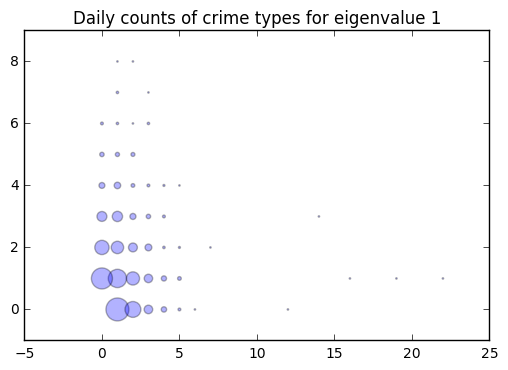

In [9]:
from collections import defaultdict
import datetime as dt

##Let's do a 2-variable plot.  We will need a routine to make the daily plots of this 
## batch of crime types, let's make it like hpCrimes for convenience. Include two more
## arguments to include if pitlist and nitlist refer to the + or - eigvalue.
## tDel is used to shift the start of the day back, as we do in problems 2 and 3.
## if you want days to start at 2am, use tDel = timedelta of 2 hours.
def pcCrimes(eign, pitlist, nitlist, psig=+1, nsig=-1, tDel = dt.timedelta(0) ):
    X = listCrimesEigVec(eign, pitlist, nitlist, psig, nsig)
    plt.title("Daily counts of crime types for eigenvalue "+str(eign+1) )
    print("Displayed crimes:\n "+str(psig)+" ",\
          X[2], "\n "+str(nsig)+" ", X[3])
    ## for each day, the crime counts
    daycountx = defaultdict(int)
    daycounty = defaultdict(int)
    for i in range(2):
        for Cr in X[i]:
            for x in Cr:
                if i==0: daycountx[(x.incident_datetime-tDel).date()] += 1
                else: daycounty[(x.incident_datetime-tDel).date()] += 1
    daylistx = set([x for x in daycountx.keys()])
    daylisty = set([x for x in daycounty.keys()])
    daylist = daylistx.union(daylisty)
    ## count the number of days with crime counts (x,y)
    ccount = defaultdict(int)
    for D in daylist:
        ccount[daycountx[D], daycounty[D]] += 1
    x = [l[0] for l in ccount.keys()]
    y = [l[1] for l in ccount.keys()]
    r = [j for l,j in ccount.items()]
    plt.scatter(x, y, r, alpha=0.3)
    ## the x-axis will be the pitlist crime count for the day
    ## the y-axis will be the nitlist crime count for the day.
    ## dot size will be the number of occurences of that pair.
    
pcCrimes(0, [0], [1], -1, -1)


In [10]:
## 2nd eigvec +01, -0
## inversely corellated -- the theft and suspicious people ones happen "everywhere"
## while liquor are mostly in the downtown core, so this would represent a manpower issue.
## the 2nd types are often "call ins" while the first are people patrolling the street.
M = hpCrimes(1, [0,1], [0,1])
M

Heat map for eigenvalue  2
Displayed crimes:
 1 (yellow-lime-green) [('Liquor', 'LIQUOR-INTOX IN PUBLIC PLACE', 0), ('Other', 'BYLAW-NOISE', 0)] 
 -1 (pink-orange-red) [('Theft from Vehicle', 'THEFT FROM MV UNDER $5000', 2), ('Other', 'SUSPICIOUS PERS/VEH/OCCURRENCE', 3)]


Displayed crimes:
 1  [('Liquor', 'LIQUOR-INTOX IN PUBLIC PLACE', 0), ('Other', 'BYLAW-NOISE', 0)] 
 -1  [('Theft from Vehicle', 'THEFT FROM MV UNDER $5000', 2), ('Other', 'SUSPICIOUS PERS/VEH/OCCURRENCE', 3)]


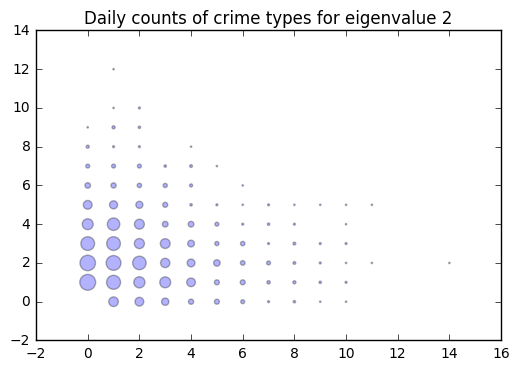

In [11]:
pcCrimes(1, [0,1], [0,1])


**Problem 2)** Re-do problem (1)a, but using time bins shifted by $2$ hours, i.e. we will consider our days to **start** at 2am, with time bins 2am to 6am,  6am to 10am, etc.  Do your results change significantly?  If any of your first four largest eigenvectors have changed substantially, describe the changes.  If you see any new, strong correllations or inverse-correllations try to find explanations for them.  Print your **explained_variance__** again for the pre-grading script. 

In [12]:
## binning for problem 2. 

tbinstr = ['2am-6am', '6am-10am', '10am-2pm', '2pm-6pm', '6pm-10pm', '10pm-2am']
# list of crime types and time periods -- the binning index
ctnl = []
for a,b in vpd.ctypes.items():
    for c,j in it.product(b, range(6)):
        ctnl.append((a,c,j))
        
## reverse-lookup dictionary, to get the index of the crime type and time chunk.
rev_ctnl = dict([(ctnl[i], i) for i in range(len(ctnl))])

## cdata dates as a set
cdays = set([c.incident_datetime.date() for c in vpd.cdata])
cdayl = list(cdays)

## reverse-lookup a date
rdaylook = dict([(cdayl[i], i) for i in range(len(cdayl))])

two_hr = dt.timedelta(0, 0, 0, 0, 0, 2)

A = np.zeros( (len(cdayl), len(ctnl) ) )
for c in vpd.cdata:
    if (c.incident_datetime-two_hr).date() not in rdaylook.keys():
        continue
    A[rdaylook[(c.incident_datetime-two_hr).date()],\
      rev_ctnl[(c.parent_incident_type, c.incident_type_primary,\
                  (c.incident_datetime - two_hr).hour //4)]] += 1.0

## build the data matrix. Every day will have a column consisting of the counts
##  of the crime types on that day. 

pca = PCA(n_components=len(ctnl))
pca.fit(A)

C = pca.components_

print(" * * * Problem 2 PCA eigval mag * * * \n")

for i in range(5):
    print("ev %.8f " %pca.explained_variance_[i], end='')

 * * * Problem 2 PCA eigval mag * * * 

ev 2.91387312 ev 2.08188974 ev 1.66330503 ev 1.57591274 ev 1.32800574 

In [13]:
print(" * * * Problem 2 PCA * * * \n")

for i in range(2):
    if (i!=0): print("\n")
    print("Eigenvalue ", i+1, " variance %.1f" % pca.explained_variance_[i])
    text_corr(C,i)

 * * * Problem 2 PCA * * * 

Eigenvalue  1  variance 2.9
+corr: 
-corr: 
  Other--BYLAW-NOISE 10pm-2am  pct -61.7
  Liquor--LIQUOR-INTOX IN PUBLIC PLACE 10pm-2am  pct -54.5
  Liquor--LIQUOR-INTOX IN PUBLIC PLACE 6pm-10pm  pct -32.4
  Other--SUSPICIOUS PERS/VEH/OCCURRENCE 10pm-2am  pct -19.5
  Other--SUSPICIOUS PERS/VEH/OCCURRENCE 6pm-10pm  pct -15.6


Eigenvalue  2  variance 2.1
+corr: 
  Other--BYLAW-NOISE 10pm-2am  pct 27.8
-corr: 
  Other--SUSPICIOUS PERS/VEH/OCCURRENCE 10am-2pm  pct -41.4
  Other--SUSPICIOUS PERS/VEH/OCCURRENCE 2pm-6pm  pct -39.9
  Theft from Vehicle--THEFT FROM MV UNDER $5000 6am-10am  pct -35.9
  Other--SUSPICIOUS PERS/VEH/OCCURRENCE 6pm-10pm  pct -30.9
  Theft from Vehicle--THEFT FROM MV UNDER $5000 10am-2pm  pct -24.4
  Other--SUSPICIOUS PERS/VEH/OCCURRENCE 10pm-2am  pct -19.6
  Other--SUSPICIOUS PERS/VEH/OCCURRENCE 6am-10am  pct -18.8


In [14]:
## EV1
## Liquor and noise 10pm--2am seem corellated.  
## liquor more concentrated downtown, while noise more evenly distributed.

M = hpCrimes(0, [0], [1], 1, 1)
M

Heat map for eigenvalue  1
Displayed crimes:
 1 (yellow-lime-green) [('Theft from Vehicle', 'THEFT FROM MV UNDER $5000', 3)] 
 1 (pink-orange-red) [('Drugs', 'TRAFFICKING-COCAINE', 2)]


Displayed crimes:
 1  [('Theft from Vehicle', 'THEFT FROM MV UNDER $5000', 3)] 
 1  [('Drugs', 'TRAFFICKING-COCAINE', 2)]


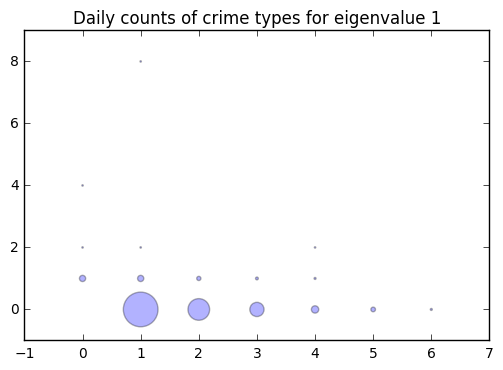

In [15]:
pcCrimes(0, [0], [1], 1, 1, dt.timedelta(0,0,0,0,0,2))

In [16]:
## 2nd eigval
## both the noise and the suspicious people seem to be everywhere.
##  hmm? 

M = hpCrimes(1, [0], [0,1,2,3])
M

Heat map for eigenvalue  2
Displayed crimes:
 1 (yellow-lime-green) [('Other', 'BYLAW-NOISE', 5)] 
 -1 (pink-orange-red) [('Other', 'SUSPICIOUS PERS/VEH/OCCURRENCE', 2), ('Other', 'SUSPICIOUS PERS/VEH/OCCURRENCE', 3), ('Theft from Vehicle', 'THEFT FROM MV UNDER $5000', 1), ('Other', 'SUSPICIOUS PERS/VEH/OCCURRENCE', 4)]


Displayed crimes:
 1  [('Other', 'BYLAW-NOISE', 5)] 
 -1  [('Other', 'SUSPICIOUS PERS/VEH/OCCURRENCE', 2), ('Other', 'SUSPICIOUS PERS/VEH/OCCURRENCE', 3), ('Theft from Vehicle', 'THEFT FROM MV UNDER $5000', 1), ('Other', 'SUSPICIOUS PERS/VEH/OCCURRENCE', 4)]


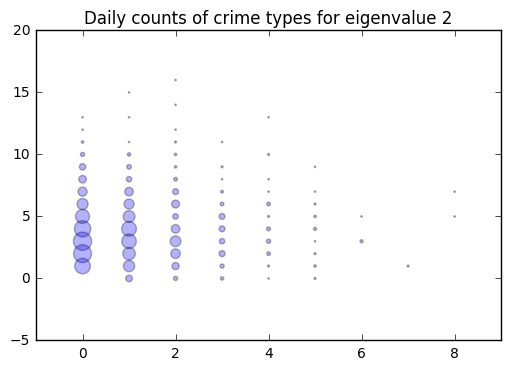

In [17]:
pcCrimes(1, [0], [0,1,2,3], 1, -1, dt.timedelta(0,0,0,0,0,2))


**Problem 3)** Re-do Problem (1) using four $6$-hour bins 4am-10am, 10am-4pm, 4pm-10pm and 10pm--4am, together with five bins for daily temperatures, and of course the bins for crime type.  

You will have a collection of $k$ vectors in $\mathbb R^n$ with $n=4 \cdot 86 \cdot 5 = 1720$ and $k$ equal to the number of days in the database.  

Divide the temperature range into these five bins: 
$$T \leq 5.1, \hskip 1cm 5.1<T\leq 8.4, \hskip 1cm 8.4<T\leq 12.3 \hskip 1cm 12.3<T \leq 15.9, \hskip 1cm 15.9<T$$
and use mean temperatures.  These are roughly the divisions of Victoria's temperature-range into its pentiles. 

Like problems (1) and (2), print the output of your **explained_variance__** for the pre-grading script. 

In [18]:
## binning for problem 3. . .

tbinstr = ['4am-10am', '10am-4pm', '4pm-10pm', '10pm-4am']
tdiv = [5.1, 8.4, 12.3, 15.9]

# list of crime types and time periods -- the binning index
ctnl = []
for a,b in vpd.ctypes.items():
    for c,j,k in it.product(b, range(4), range(5)):
        ctnl.append((a,c,j,k))
        
## reverse-lookup dictionary, to get the index of the crime type and time chunk.
rev_ctnl = dict([(ctnl[i], i) for i in range(len(ctnl))])

## cdata dates as a set
cdays = set([c.incident_datetime.date() for c in vpd.cdata])
cdayl = list(cdays)

## reverse-lookup a date
rdaylook = dict([(cdayl[i], i) for i in range(len(cdayl))])

## get the temperature bin
def tBin(T):
    if T<=5.1: return 0
    if T<=8.4: return 1
    if T<=12.3: return 2
    if T<=15.9: return 3
    return 4

four_hr = dt.timedelta(0, 0, 0, 0, 0, 4)

A = np.zeros( (len(cdayl), len(ctnl) ) )
for c in vpd.cdata:
    if (c.incident_datetime-four_hr).date() not in rdaylook.keys():
        continue   
    ## check the date is in the weather library
    if (c.incident_datetime.date() not in vpd.wdatlist):
        continue
    A[rdaylook[(c.incident_datetime-four_hr).date()],\
      rev_ctnl[(c.parent_incident_type, c.incident_type_primary,\
                (c.incident_datetime-four_hr).hour //6,\
                tBin(vpd.wdatlist[c.incident_datetime.date()][2]))]] += 1.0
    
## build the data matrix. Every day will have a column consisting of the counts
##  of the crime types on that day. 

pca = PCA(n_components=len(ctnl))
pca.fit(A)

C = pca.components_
print(" * * * Problem 3 PCA eigval mag * * * \n")
for i in range(5):
    print("ev %.8f " %pca.explained_variance_[i], end='')

 * * * Problem 3 PCA eigval mag * * * 

ev 7.62893222 ev 6.16498462 ev 5.20412475 ev 4.40512358 ev 1.19971401 

In [19]:
## let's run through the temperature database and divide it into $5$ equal-weight temperature bins.
tBinName = ['Cold', 'Cool', 'Med', 'Warm', 'Hot']

def text_corr(C, r):
    Cp, Cn = exp_row_pca(C,r)
    print("+corr: ")
    for x in Cp:
        if (x[0]>15.0):
            print(" ", ctnl[x[1]][0]+"--"+ctnl[x[1]][1]+" "+tbinstr[ctnl[x[1]][2]],\
                  ' '+tBinName[ctnl[x[1]][3]], " pct %.1f" % x[0])
    print("-corr: ")
    for x in Cn:
        if (x[0]<-15.0):
            print(" ", ctnl[x[1]][0]+"--"+ctnl[x[1]][1]+" "+tbinstr[ctnl[x[1]][2]],\
                  ' '+tBinName[ctnl[x[1]][3]]," pct %.1f" % x[0])
            
for i in range(2):
    if (i!=0): print("\n")
    print("Eigenvalue ", i+1, " variance %.1f" % pca.explained_variance_[i])
    text_corr(C,i)
    

Eigenvalue  1  variance 7.6
+corr: 
-corr: 
  Other--SUSPICIOUS PERS/VEH/OCCURRENCE 4pm-10pm  Hot  pct -32.4
  Other--SUSPICIOUS PERS/VEH/OCCURRENCE 10am-4pm  Hot  pct -30.2
  Other--BYLAW-NOISE 10pm-4am  Hot  pct -25.9
  Other--SUSPICIOUS PERS/VEH/OCCURRENCE 10pm-4am  Hot  pct -23.9
  Theft--THEFT-OTHER UNDER $5000 10am-4pm  Hot  pct -22.7
  Liquor--LIQUOR-INTOX IN PUBLIC PLACE 10pm-4am  Hot  pct -22.4
  Theft from Vehicle--THEFT FROM MV UNDER $5000 10am-4pm  Hot  pct -21.8
  Liquor--LIQUOR-INTOX IN PUBLIC PLACE 4pm-10pm  Hot  pct -21.0
  Other--SUSPICIOUS PERS/VEH/OCCURRENCE 4am-10am  Hot  pct -17.8
  Theft from Vehicle--THEFT FROM MV UNDER $5000 4am-10am  Hot  pct -16.4
  Theft--THEFT-OTHER UNDER $5000 4pm-10pm  Hot  pct -15.9
  Property Crime--MISCHIEF $5000 OR UNDER 10am-4pm  Hot  pct -15.7
  Theft--THEFT-SHOPLIFTING UNDER $5000 4pm-10pm  Hot  pct -15.1


Eigenvalue  2  variance 6.2
+corr: 
  Other--SUSPICIOUS PERS/VEH/OCCURRENCE 4pm-10pm  Warm  pct 31.5
  Other--SUSPICIOUS PERS/V

In [20]:
##1st eigval -- these seem to be all over the place.  Our eigenvectors appear
##  to be primarily breaking up the variation by mean temperature blocks. 

M = hpCrimes(0, [0,1,2,3,4], [])
M

Heat map for eigenvalue  1
Displayed crimes:
 1 (yellow-lime-green) [('Other', 'SUSPICIOUS PERS/VEH/OCCURRENCE', 1, 2), ('Other', 'SUSPICIOUS PERS/VEH/OCCURRENCE', 2, 2), ('Theft from Vehicle', 'THEFT FROM MV UNDER $5000', 1, 2), ('Theft', 'THEFT-OTHER UNDER $5000', 1, 2), ('Liquor', 'LIQUOR-INTOX IN PUBLIC PLACE', 3, 2)] 
 -1 (pink-orange-red) []


Displayed crimes:
 1  [('Other', 'SUSPICIOUS PERS/VEH/OCCURRENCE', 1, 2), ('Other', 'SUSPICIOUS PERS/VEH/OCCURRENCE', 2, 2), ('Theft from Vehicle', 'THEFT FROM MV UNDER $5000', 1, 2), ('Theft', 'THEFT-OTHER UNDER $5000', 1, 2)] 
 1  [('Liquor', 'LIQUOR-INTOX IN PUBLIC PLACE', 3, 2)]


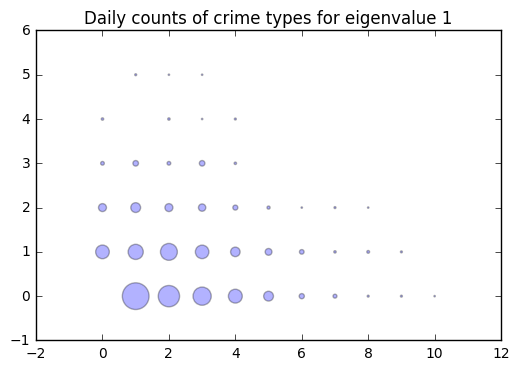

In [21]:
pcCrimes(0, [0,1,2,3], [4], 1, 1, dt.timedelta(0,0,0,0,0,4))


In [22]:
##2nd eigval

M = hpCrimes(1, [], [0,1,2,3])
M

Heat map for eigenvalue  2
Displayed crimes:
 1 (yellow-lime-green) [] 
 -1 (pink-orange-red) [('Other', 'SUSPICIOUS PERS/VEH/OCCURRENCE', 1, 2), ('Other', 'SUSPICIOUS PERS/VEH/OCCURRENCE', 2, 2), ('Theft from Vehicle', 'THEFT FROM MV UNDER $5000', 1, 2), ('Other', 'SUSPICIOUS PERS/VEH/OCCURRENCE', 1, 1)]


Displayed crimes:
 -1  [('Other', 'SUSPICIOUS PERS/VEH/OCCURRENCE', 2, 4), ('Other', 'SUSPICIOUS PERS/VEH/OCCURRENCE', 1, 4)] 
 -1  [('Other', 'BYLAW-NOISE', 3, 4), ('Other', 'SUSPICIOUS PERS/VEH/OCCURRENCE', 3, 4), ('Theft', 'THEFT-OTHER UNDER $5000', 1, 4)]


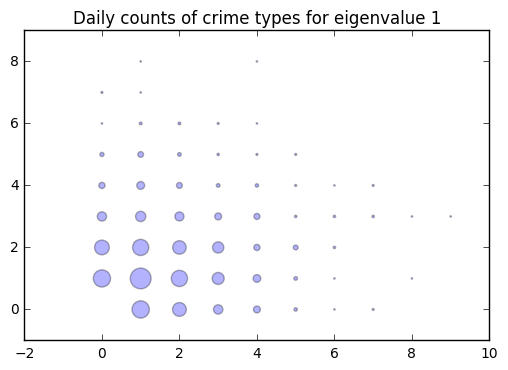

In [23]:
pcCrimes(0, [0,1], [2,3,4], -1, -1, dt.timedelta(0,0,0,0,0,4))


### When complete

Save your assignment in **Homework/asst.3.ipynb** in your **mp248** bitbucket repository.  

A pre-grading script will start running on Monday (Feb 27th), and will give you feedback in your Grades Feedback item for Assignment 3 (Simple Submissions) on Course Spaces.  The script will only be able to tell you if it can find your assignment, and if the eigenvalues of the PCA analysis are close to the right answer, to about 8 decimal places. 

The assignment on your BitBucket repository at **noon**, of **March 8th** is the assignment that will be graded. 
